## CS 6120: Natural Language Processing - Prof. Ahmad Uzair

### Assignment 2: Text Classification and Neural Network
### Total Points: 100 points

In Assignment 2, you will be dealing with text classification using Multinomial Naive Bayes and Neural Networks. You will also be dealing with vector visualization. In the previous assingment you implemented Bag of Words as the feature selection method. However, in this assignment you will be using TF-IDF Vectorization instead of Bag of Words. We recommend starting with this assignment a little early as the datasets are quite large and several parts of the assignment might take long duration to execute. 

## Question 1 Text Classification

In the first question you will be dealing with 20 News Group Dataset. You are required to implement TF-IDF vectorization from scratch and perform Multinomial Naive Bayes Classification on the News Group Dataset.
You may use appropriate packages or modules for fitting the Multinomial Naive Bayes Model, however, the implementation of the TF-IDF Vectorization should be from the scratch.

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon a messages posted before and after a specific date.

Link to the original dataset: http://archive.ics.uci.edu/ml/datasets/Twenty+Newsgroups

You can also import the dataset from sklearn.datasets

In [1]:
#importing the libraries

import numpy as np
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
import pandas as pd
import re
import numpy as np
from nltk.tokenize import  word_tokenize 
import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics


In [2]:
# Import the 20 news group dataset utilizing sklearn library

mydata_train = fetch_20newsgroups(data_home=None,subset='train', categories=None, shuffle=True, 
                                  random_state=42, remove=('headers','footers','quotes'), download_if_missing=True )

mydata_test = fetch_20newsgroups(data_home=None,subset='test', categories=None, shuffle=True, 
                                 random_state=42, remove=('headers','footers','quotes'), download_if_missing=True )


In [3]:
# Print the news groups(target) in the dataset

print(list(mydata_train.target_names))

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [4]:
# What is the type of 'mydata_train' and 'mydata_test'

print(type(mydata_train))
print(type(mydata_test))

<class 'sklearn.utils.Bunch'>
<class 'sklearn.utils.Bunch'>


In [5]:
# Check the length of the data

print(len(mydata_train.data))
print(len(mydata_train.filenames))
print(len(mydata_test.data))
print(len(mydata_test.filenames))

11314
11314
7532
7532


### Expected Output: 
11314

11314

7532

7532

## Extracting Features from the Dataset                        (20 Points)

In order to perform machine learning on text documents, we first need to turn the text content into numerical feature vectors.

### TF-IDF Vectorization

Our model cannot simply read the text data so we convert it into numerical format. In order to convert the data into numerical format we create vectors from text.

For this particular purpose we could either employ Bag of Words or TF-IDF Vectorization

Bag of Words just creates a set of vectors containing the count of word occurrences in the document (reviews), while the TF-IDF model contains information on the more important words and the less important ones as well.

TF-IDF stands for Term Frequency-Inverse Document Frequency, which instead of giving more weight to words that occur more frequently, it gives a higher weight to words that occur less frequently.

Ref:https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/#:~:text=Bag%20of%20Words%20just%20creates,less%20important%20ones%20as%20well.

TF-IDF = Term Frequency (TF) * Inverse Document Frequency (IDF)

Term Frequency is the measure of the frequency of words in a document. It is the ratio of the number of times the word appears in a document compared to the total number of words in that document.

The words that occur rarely in the corpus have a high IDF score. It is the log of the ratio of the number of documents to the number of documents containing the word.

idf(t) = log(N/(df + 1))

In [6]:
text = mydata_train.data
test = mydata_test.data

## Preprocessing the Corpus

In [7]:
# Preprocessing the data
import string
from tkinter import _flatten

lines = [] 
word_list = [] 

for line in text:
    rmv_punc = "".join([w.lower() for w in line if not w in string.punctuation])
    token_line = word_tokenize(rmv_punc)
    l = [t for t in token_line if t.isalpha()]
    lines.append(l)

# Make sure the word_list contains unique tokens

word_list = " ".join(list(_flatten(lines)))
word_list = word_tokenize(word_list)
word_list = list(np.unique(np.array(word_list)))

# Calculate the total documents present in the corpus
total_docs = len(text)
 
#Create a dictionary to keep track of index of each word
dict_idx = {}

for i in range(len(word_list)):
    dict_idx[word_list[i]] = i

In [8]:
# Create a frequency dictionary
 
def frequency_dict(lines):
    '''
    lines: list containing all the tokens
    ---
    freq_word: returns a dictionary which keeps the count of the number of documents containing the given word
    '''
    
    freq_word = {}
    
    for w in word_list:
        freq_word[w] = 0   

        for l in lines:
            if w in l:
                freq_word[w] += 1
    
    return freq_word

In [9]:
# Create a dictionary containing the frequency of words utilizing the 'frequency_dict' function

# Expect this chunk to take a comparatively longer time to execute since our dataset is large

freq_word = frequency_dict(lines)

freq_word

{'a': 8310,
 'aa': 29,
 'aaa': 24,
 'aaaaaaaaaaaa': 1,
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaauuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuugggggggggggggggg': 1,
 'aaah': 1,
 'aaahh': 1,
 'aaahhhh': 1,
 'aaai': 1,
 'aaaimit': 1,
 'aaamajors': 1,
 'aacc': 1,
 'aadams': 1,
 'aah': 1,
 'aalternate': 1,
 'aamazing': 1,
 'aamir': 4,
 'aammmaaaazzzzzziinnnnggggg': 1,
 'aan': 1,
 'aanbieden': 1,
 'aanerud': 1,
 'aangeboden': 1,
 'aangegeven': 1,
 'aangezien': 1,
 'aantal': 1,
 'aantalsnijpunten': 1,
 'aao': 1,
 'aap': 1,
 'aaplayexe': 1,
 'aargh': 1,
 'aarm': 1,
 'aaron': 11,
 'aarons': 2,
 'aaronson': 1,
 'aarp': 1,
 'aarseth': 1,
 'aarskog': 1,
 'aas': 3,
 'aasaiaa': 1,
 'aasked': 1,
 'aassists': 1,
 'aaverage': 1,
 'aavso': 1,
 'ab': 25,
 'ababspalestinians': 1,
 'abandon': 15,
 'abandond': 1,
 'abandoned': 24,
 'abandoning': 2,
 'abandons': 1,
 'abatement': 1,
 'abates': 1,
 'abba': 1,
 'abbasids': 1,
 'abberant': 1,
 'abberation': 1,
 'abbey': 5,
 'abbie': 1,
 'abbot': 1,
 'abbott': 5,
 'abbotts': 1,
 'abbr

In [10]:
# Create a function to calculate the Term Frequency

def term_frequency(document, word):
    '''
    document: list containing the entire corpus
    word: word whose term frequency is to be calculated
    ---
    tf: returns term frequency value
    '''
    
    n = len(document)
    occ = 0
    
    for w in document:
        if w == word:
            occ += 1
            
    tf = occ/n
    
    return tf

In [11]:
# Create a function to calculate the Inverse Document Frequency
 
def inverse_df(word):
    '''
    word: word whose inverse document frequency is to be calculated
    ---
    idf: return inverse document frequency value
    '''
    
    idf = np.log(total_docs/freq_word[word]+1)
    
    return idf

In [12]:
#Create a function to combine the term frequencies (TF) and inverse document (IDF) frequencies calculated above to get TF-IDF

def tfidf(sentence, dict_idx):
    '''
    sentence: list containing the entire corpus
    dict: dictionary keeping track of index of each word
    ---
    tf_idf_vec: returns computed tf-idf
    '''
    
    n= len(dict_idx)
    tf_idf_vec = np.zeros(n)
    
    for w in sentence:
        tf = term_frequency(sentence, w)
        idf = inverse_df(w)

        tf_idf_vec[dict_idx[w]] = tf*idf
    
    return tf_idf_vec

In [13]:
#Compute the vectors utilizing the 'tfidf' function created above to obtain a TF-IDF Encoded text corpus

vectors = []

for line in lines:
    v = tfidf(line, dict_idx)
    vectors.append(v)


## Multinomial Naive Bayes (10 Points)

In [16]:
from sklearn.preprocessing import normalize

#Fit a Multinomial Naive Bayes Model on our dataset

data = normalize(vectors, axis=0, norm='max')
clf = MultinomialNB(alpha = 0.01)
clf.fit(data, mydata_train.target)


MultinomialNB(alpha=0.01)

In [17]:
#Perform testing on the train dataset

pred = clf.predict(vectors)

In [18]:
#Calculate the F1 Score and the Accuracy

F1_score = metrics.f1_score(mydata_train.target, pred, average = 'macro')
Accuracy = metrics.accuracy_score(mydata_train.target, pred)

print("F1 Score: ", F1_score)
print("Accuracy: ", Accuracy)

F1 Score:  0.9652750848161105
Accuracy:  0.9625243061693477


### Expected Output:
F1 Score: 0.9533633964397735

Accuracy: 0.9524482941488421

Your accuracy does not have to be exactly the same. This is just to give you an estimate of what could you expect your accuracy to be around.

## Question 2 Vector Visualization

In this unsupervised learning task we are going to cluster wikipedia articles into groups using T-SNE visualization after vectorization.

### Collect articles from Wikipedia (10 points)

In this section we will download articles from wikipedia and then vectorize them in the next step. You can select somewhat related topics or fetch the articles randomly. 
(Use dir() and help() functions or refer wikipedia documentation)
You may also pick any other data source of your choice instead of wikipedia.

In [19]:
# install libraries
# pip install wikipedia

In [20]:
import wikipedia
from wikipedia.exceptions import WikipediaException
from itertools import repeat

'''
 Generate a list of wikipedia article to cluster 
 You can maintain a static list of titles or generate them randomly using wikipedia library
 Some topics include:
 ["Northeastern Unversity", "Natural language processing", "Machine learning", "Quantum machine learning", "Artificial intelligence", "Data science", "Master in Data Science", 
 "Bank of America", "Visa Inc.", "European Central Bank", "Bank", "Financial technology","International Monetary Fund", 
 "Basketball", "Swimming", "Tennis", "Football", "College Football", "Association Football"]

 You can add more topics from different categories so that we have a diverse dataset to work with. 
 Ex- About 3+ categories(groups), 3+ topics in each category, 3+ articles in each topic
'''

# selected topics

group_1 = ["Natural language processing", "Machine learning", "Quantum machine learning", "Artificial intelligence", "Data science"]
group_2 = ["Basketball", "Swimming", "Tennis", "Football", "College Football"]
group_3 = ["Bank of America", "Visa Inc.", "European Central Bank", "Bank", "Financial technology"]

topics = group_1 + group_2 + group_3

# list of articles to be downloaded
articles = {}
for t in topics:
    A = wikipedia.search(t, results = 3)
    
    if t in group_1:
        i = 1
    elif t in group_2:
        i = 2
    elif t in group_3:
        i = 3
    
    for a in A:
        articles[a] = i
    
# download and store articles (summaries) in this variable
data = []
label = []

for a in articles:
    try:
        data.append(wikipedia.summary(a))
        label.append(articles[a])
    
    except WikipediaException:
        continue

C:\Users\nahsi\Anaconda3\envs\CS6120\lib\site-packages\wikipedia\wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file C:\Users\nahsi\Anaconda3\envs\CS6120\lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


### Cleaning the Data (5 points)
In this step you will decide whether to clean the data or not. If you choose to clean, you may utilize the clean function from assignment 1.

**Question:** Why are you (not) choosing to clean the data? Think in terms of whether cleaning data will help in the clustering or not.

**Answer(1-3 sentences):** 

    I chose not to clean data because after actually comparing the plotting results with and without clean, I found that unclean data would help more with clustering. 
    
    My cleaning steps included removing punctuation and stop words, numbers, etc. I thought this should be more helpful for clustering, but in reality it is not. But the difference between them is not that big.
    

In [21]:
# You can use Assignment 1's clean message function
import re
import nltk
import string
#nltk.download('punkt')
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def clean_message(message):
    
    stopw = stopwords.words('english')
    Lemma = WordNetLemmatizer()
    
    message = message.lower()
    message = re.sub(r"http\S+", " ", message)
    message = re.sub(r"www.\S+", " ", message)
    message = re.sub(r"<br />", " ", message)
    
    rmv_punc = "".join([r for r in message if not r in string.punctuation])
    tokens = word_tokenize(rmv_punc)
    words = [t for t in tokens if not t in stopw and t.isalpha()]
    
    # lemmatization
    message_cleaned = " ".join([Lemma.lemmatize(w) for w in words])
    
    return message



### Vectorize the articles (5 points)

In this step, we will vectorize the text data. You can use TfidfVectorizer() or countVectorizer() from sklearn library.

In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer

# # Clean data
# data_cleaned = [clean_message(m) for m in data]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data)

In [122]:
print(X.shape)

(38, 2300)


### Sample Output:
(36, 1552)

### Plot Articles (10 points)
Now we will try to verify the groups of articles using T-SNE from sklearn library.

In [123]:
 from sklearn.manifold import TSNE

# call TSNE() to fit the data

X_tsne = TSNE(n_components=2).fit_transform(X)

Plot and annotate the points with different markers for different expected groups.

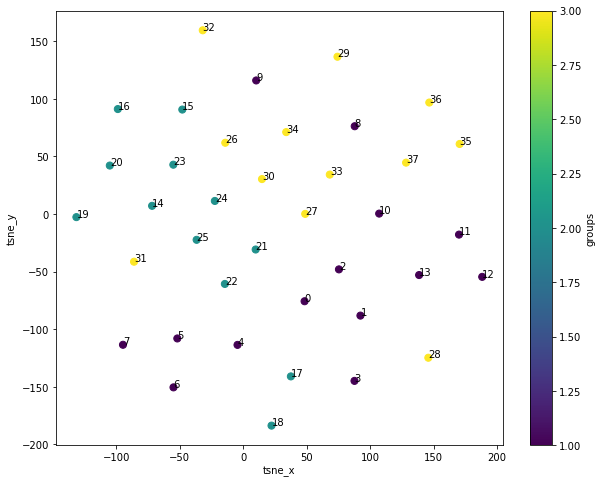

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

# get a figure handle
fig,ax = plt.subplots(figsize=(10,8))

X_tsne_df = pd.DataFrame({'tsne_x': X_tsne[:,0], 'tsne_y': X_tsne[:,1], 'groups': label})
X_tsne_df.plot.scatter(x = 'tsne_x', y = 'tsne_y', c = 'groups', ax = ax, s = 50, colormap='viridis');

for i in range(len(X_tsne_df)):
    ax.annotate(i,(X_tsne[:,0][i],X_tsne[:,1][i]))

**Question:** Comment about the categorizion done by T-SNE. Do the articles of related topics cluster together? (5 points)

**Answer(1-3 sentences):**  

    After several trials, it's clear from the results presented on the plotting that in most cases, articles on the related topics are relatively clustered together.


# Question 3 Building Neural Networks

### We are gonna use Emotions Dataset for this task. We need to classify the given text into different kind of emotions like happy,sad,anger etc.., 

### We are providing train.txt and val.txt files along with this notebook. 

### Library Imports and Utility functions

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import re
#string.punctuation
import nltk
from sklearn import preprocessing
import numpy as np

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())


def clean_text(text):
  # From the last assignment
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text_links_removed = "".join([char for char in text if char not in string.punctuation])
    text_cleaned = " ".join([word for word in re.split('\W+', text_links_removed)
        if word not in stopword])
    text = " ".join([wn.lemmatize(word) for word in re.split('\W+', text_cleaned)])
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nahsi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nahsi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\nahsi\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


### Q) Importing the datasets and do the necessary cleaning and convert the text into the vectors which are mentioned in the below code blocks. (10 points)

In [29]:
# Import the train.txt and val.txt file into pandas dataframe format 

# train 
train_data = pd.read_csv('train.txt', sep=";", header = None)

# validation
val_data = pd.read_csv('val.txt', sep=";", header = None)

# and printout the train.shape and validation.shape 

print("train_data:", train_data.shape) 
print("val_data:", val_data.shape)

# expected shape of train dataset is (16000,2) and validation dataset is (2000,2)

train_data: (16000, 2)
val_data: (2000, 2)


In [30]:
# clean the text in the train and validation dataframes using the clean_text function provided above

train_clean = []
val_clean = []

for text in train_data.values:
    cleaned_train = clean_text(text[0])
    train_clean.append(cleaned_train)

for text in val_data.values:
    cleaned_val = clean_text(text[0])
    val_clean.append(cleaned_val)
    
train_clean = np.array(train_clean)
val_clean = np.array(val_clean)

In [31]:
# initialise count vectorizer from sklearn module with default parameter
Count_vec = CountVectorizer()

# fit on train dataset and transform both train and validation dataset
Count_vec.fit(train_clean)

train_count = Count_vec.transform(train_clean).toarray()
val_count = Count_vec.transform(val_clean).toarray()


In [32]:
# initialise tfidf vectorizer from sklearn module with default parameter
Tfidf_vec = TfidfVectorizer()

# fit on train dataset and transform both train and validation dataset
Tfidf_vec.fit(train_clean)

train_tfidf = Tfidf_vec.transform(train_clean).toarray()
val_tfidf = Tfidf_vec.transform(val_clean).toarray()


In [33]:
# initialise label encoder from sklearn module
le = preprocessing.LabelEncoder()

# fit on train labels and transform both train and validation labels

train_labels = [d[1] for d in train_data.values]
val_labels = [d[1] for d in val_data.values]

le.fit(train_labels)

train_le = le.transform(train_labels)
val_le = le.transform(val_labels)


In [34]:
# convert the labels into one hot encoding form
ohe = preprocessing.OneHotEncoder(handle_unknown='ignore')

ohe.fit(np.array(train_le).reshape(-1, 1))

train_ohe = ohe.transform(np.array(train_le).reshape(-1, 1)).toarray()
val_ohe = ohe.transform(np.array(val_le).reshape(-1, 1)).toarray()

### Q) Build the neural networks using tensorflow keras by following the below instructions. Evaluate the model on different metrics and comment your observations. (15 points)

In [35]:
labels = [d[1] for d in train_data.values]

classes = []
for l in labels:
    if l not in classes:
        classes.append(l)

print('classes:', classes)
print('number of classes:', len(classes))

classes: ['sadness', 'anger', 'love', 'surprise', 'fear', 'joy']
number of classes: 6


In [36]:
import tensorflow as tf
from keras.layers import Dense, Dropout, Input

tf.random.set_seed(42)

# complete this linear model in tensorflow
def build_model(X):
    
    model = tf.keras.Sequential()
    
  # layer 1 : input layer
    model.add(tf.keras.Input((X.shape[1],)))

  # layer 2 : add the dense layer with 2048 units and relu activation
    model.add(tf.keras.layers.Dense(units=2048, activation='relu'))
    
  # layer 3 : add the dropout layer with dropout rate of 0.5
    model.add(tf.keras.layers.Dropout(0.5))
    
  # layer 4 : add the dense layer with 1024 units with tanh activation and with l2 regularization
    model.add(tf.keras.layers.Dense(units=1024, activation='tanh', 
                                    kernel_regularizer=tf.keras.regularizers.l2(0.001)))   
    
  # layer 5 : add the dropout layer with dropout rate of 0.5
    model.add(tf.keras.layers.Dropout(0.5))
    
  # layer 6 : add the dense layer with 512 units with tanh activation and with l2 regularization
    model.add(tf.keras.layers.Dense(units=512, activation='tanh', 
                                    kernel_regularizer=tf.keras.regularizers.l2(0.001)))

  # layer 7 : add the dropout layer with dropout rate of 0.5
    model.add(tf.keras.layers.Dropout(0.5))

  # layer 8 : add the dense layer with 256 units with tanh activation and with l2 regularization
    model.add(tf.keras.layers.Dense(units=256, activation='tanh', 
                                    kernel_regularizer=tf.keras.regularizers.l2(0.001)))

  # layer 9 : add the dropout layer with dropout rate of 0.5
    model.add(tf.keras.layers.Dropout(0.5))

  # layer 10 : add the dense layer with 128 units with tanh activation and with l2 regularization
    model.add(tf.keras.layers.Dense(units=128, activation='tanh', 
                                    kernel_regularizer=tf.keras.regularizers.l2(0.001)))

  # layer 11 : add the dropout layer with dropout rate of 0.5
    model.add(tf.keras.layers.Dropout(0.5))

  # layer 12 : output layer with units equal to number of classes and activation as softmax
    model.add(tf.keras.layers.Dense(units=6, activation='softmax'))

  # use loss as categorical crossentropy, optimizer as rmsprop and evaluate model on auc,precision,recall,accuracy 
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
                  metrics=['AUC', 'Precision', 'Recall', 'accuracy']) 
    
    return model


In [37]:
# call the build_model function and initialize the model
model_count = build_model(train_count)

In [38]:
# train and validate the model on the count vectors of text which we have created initially for 10 epochs, 
# adjust batch size according to your computation power (suggestion use : 8)

history = model_count.fit(
    train_count,
    train_ohe,
    batch_size=8,
    epochs=10,
    validation_data=(val_count,val_ohe),
)

Epoch 1/10
2000/2000 [==============================] - 38s 18ms/step - loss: 2.0449 - auc: 0.8767 - precision: 0.7042 - recall: 0.5102 - accuracy: 0.6071 - val_loss: 0.9422 - val_auc: 0.9689 - val_precision: 0.8532 - val_recall: 0.8050 - val_accuracy: 0.8255
Epoch 2/10
2000/2000 [==============================] - 36s 18ms/step - loss: 0.8204 - auc: 0.9687 - precision: 0.8616 - recall: 0.8224 - accuracy: 0.8404 - val_loss: 0.7215 - val_auc: 0.9741 - val_precision: 0.8691 - val_recall: 0.8430 - val_accuracy: 0.8570
Epoch 3/10
2000/2000 [==============================] - 35s 18ms/step - loss: 0.6040 - auc: 0.9800 - precision: 0.8967 - recall: 0.8761 - accuracy: 0.8856 - val_loss: 0.6387 - val_auc: 0.9767 - val_precision: 0.8844 - val_recall: 0.8645 - val_accuracy: 0.8730
Epoch 4/10
2000/2000 [==============================] - 35s 17ms/step - loss: 0.5241 - auc: 0.9843 - precision: 0.9115 - recall: 0.8941 - accuracy: 0.9024 - val_loss: 0.6789 - val_auc: 0.9729 - val_precision: 0.8678 - va

In [39]:
# plot train loss vs val loss, train auc vs val auc, train recall vs val recall, train precision vs val precision and train accuracy vs val accuracy and comment your observations
print(history.history.keys())

dict_keys(['loss', 'auc', 'precision', 'recall', 'accuracy', 'val_loss', 'val_auc', 'val_precision', 'val_recall', 'val_accuracy'])


Both train and val data sets have decreasing ‘loss’ trends, but train has a steeper downward trend, while val is relatively smooth and does not vary much.


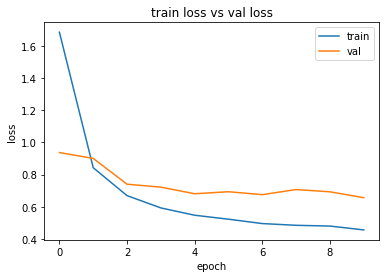

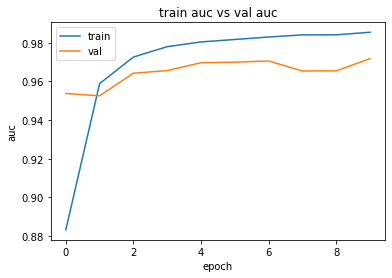

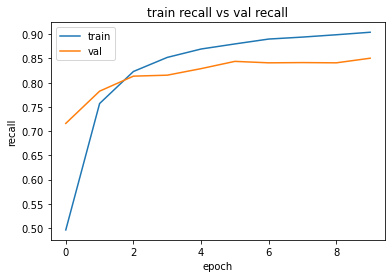

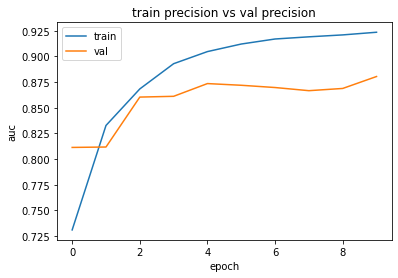

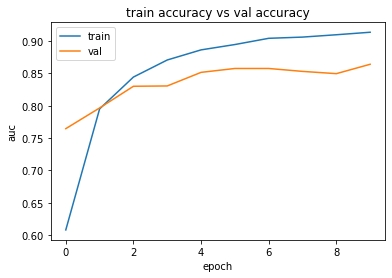

In [126]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('train loss vs val loss - count vectors')
plt.legend(['train', 'val'])

plt.figure(2)
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.xlabel('epoch')
plt.ylabel('auc')
plt.title('train auc vs val auc - count vectors')
plt.legend(['train', 'val'])

plt.figure(3)
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.xlabel('epoch')
plt.ylabel('recall')
plt.title('train recall vs val recall - count vectors')
plt.legend(['train', 'val'])

plt.figure(4)
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.xlabel('epoch')
plt.ylabel('auc')
plt.title('train precision vs val precision - count vectors')
plt.legend(['train', 'val'])

plt.figure(5)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('auc')
plt.title('train accuracy vs val accuracy - count vectors')
plt.legend(['train', 'val'])

plt.show()

**Observations：**

    For plot 1, both train and val data sets have decreasing ‘loss’ trends, But the change in train first rises sharply and then slowly, while val decrease relatively smoothly with little change.

    In the remaining plots (about auc, recall, precision, and accuaracy for train vs. val), the both data show an increasing trend. Again, train has a wide range of variation and rises sharply, while val has a relatively small range of variation and rises slowly, or rather, it is waving up and down, but the overall trend is still upward.
    

In [127]:
# again call the build_model function and initialize the model
model_tfidf = build_model(train_tfidf)

In [128]:
# train and validate the model on the tfidf vectors of text which we have created initially for 10 epochs, 
# adjust batch size according to your computation power (suggestion use : 8)

history = model_tfidf.fit(
    train_tfidf,
    train_ohe,
    batch_size=8,
    epochs=10,
    validation_data=(val_tfidf,val_ohe),
)

Epoch 1/10
2000/2000 [==============================] - 38s 18ms/step - loss: 1.6552 - auc: 0.8818 - precision: 0.7337 - recall: 0.4860 - accuracy: 0.6027 - val_loss: 0.9033 - val_auc: 0.9557 - val_precision: 0.8359 - val_recall: 0.7335 - val_accuracy: 0.7850
Epoch 2/10
2000/2000 [==============================] - 37s 18ms/step - loss: 0.8285 - auc: 0.9590 - precision: 0.8374 - recall: 0.7675 - accuracy: 0.8009 - val_loss: 0.7772 - val_auc: 0.9633 - val_precision: 0.8419 - val_recall: 0.8040 - val_accuracy: 0.8225
Epoch 3/10
2000/2000 [==============================] - 36s 18ms/step - loss: 0.6578 - auc: 0.9734 - precision: 0.8758 - recall: 0.8289 - accuracy: 0.8502 - val_loss: 0.7005 - val_auc: 0.9681 - val_precision: 0.8694 - val_recall: 0.8185 - val_accuracy: 0.8455
Epoch 4/10
2000/2000 [==============================] - 36s 18ms/step - loss: 0.5810 - auc: 0.9791 - precision: 0.8961 - recall: 0.8584 - accuracy: 0.8751 - val_loss: 0.7396 - val_auc: 0.9654 - val_precision: 0.8655 - va

In [129]:
print(history.history.keys())

dict_keys(['loss', 'auc', 'precision', 'recall', 'accuracy', 'val_loss', 'val_auc', 'val_precision', 'val_recall', 'val_accuracy'])


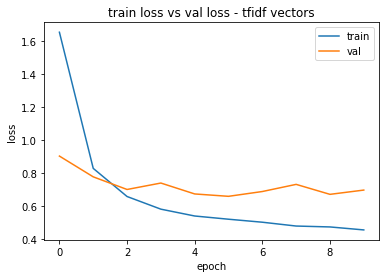

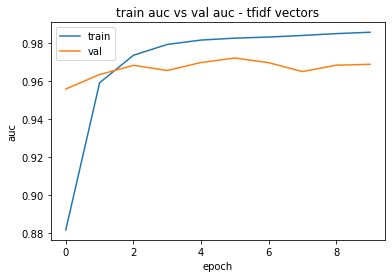

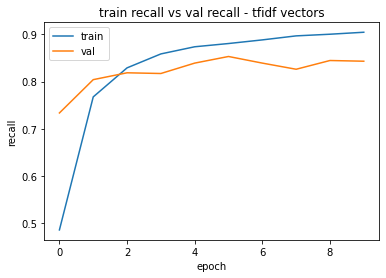

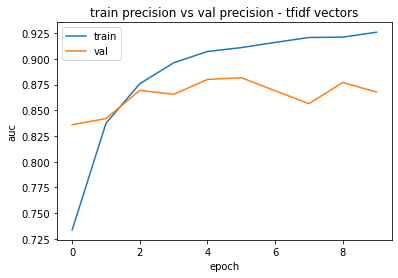

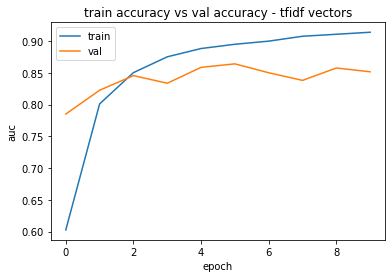

In [130]:
# plot train loss vs val loss, train auc vs val auc, train recall vs val recall, train precision vs val precision and train accuracy vs val accuracy and comment your observations
import matplotlib.pyplot as plt

plt.figure(6)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('train loss vs val loss - tfidf vectors')
plt.legend(['train', 'val'])

plt.figure(7)
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.xlabel('epoch')
plt.ylabel('auc')
plt.title('train auc vs val auc - tfidf vectors')
plt.legend(['train', 'val'])

plt.figure(8)
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.xlabel('epoch')
plt.ylabel('recall')
plt.title('train recall vs val recall - tfidf vectors')
plt.legend(['train', 'val'])

plt.figure(9)
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.xlabel('epoch')
plt.ylabel('auc')
plt.title('train precision vs val precision - tfidf vectors')
plt.legend(['train', 'val'])

plt.figure(10)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('auc')
plt.title('train accuracy vs val accuracy - tfidf vectors')
plt.legend(['train', 'val'])

plt.show()

**Observations：**
    
    The data trends presented by train and validate the model on the tfidf vectors look similar to those presented by train and validate the model on the count vectors, with 'loss ' shows a decreasing trend, while 'auc', 'recall', 'precision', and 'accuracy' shows an increasing trend.
    
    The slight difference is that the train is still changing rapidly first and then smoothly, while the val range is still not as large as the train range, it does fluctuate more. Val curve looks sharper, while the train is smoother.
    

## Question 4 Theory Question  

What is the difference between Count Vectorizer, TFIDF, Word2Vec and Glove? (5 points)

**Answer:** 

    1. Count Vectorizer is a text feature extraction method that belongs to the common class of feature value calculation. For each training text, it only considers the frequency of each word in that training text. countVectorizer converts the words in the text into a word frequency matrix, and it calculates the number of occurrences of each word by the fit_transform function

    2. TF-IDF is a statistical method to evaluate the importance of a word for a document set or one of the documents in a corpus. The importance of a word increases proportionally with its occurrence in a document, but decreases inversely with its frequency in a corpus. various forms of TF-IDF weighting are often applied by search engines as a measure or rating of the relevance between a document and a user's query. the main idea of TF-IDF is that if a word or phrase has a high frequency of TF occurrence in an article and a low frequency of TF occurrence in other articles, then the word or phrase is considered to have good category differentiation ability and is suitable for classification.

    3. Word2vec is a group of related models used to generate word vectors. These models are shallow, two-layer neural networks that are trained to reconstruct linguistic word text. The networks are represented by words and need to guess the input words in adjacent positions, under the assumption of the bag-of-words model in word2vec, the order of words is not important. After training, the word2vec model can be used to map each word to a vector, which can be used to represent word-to-word relationships, and is the hidden layer of the neural network. It is the process of transforming words into "computable", "structured" vectors.

    4. Glove is a word representation tool based on global word frequency statistics, it can list a word into a vector of real numbers and calculate the semantic similarity between two words by operations on the vector, such as Euclidean distance or cosine similarity.

*The differences between them are:*

    1. Glove and Word2vec are both unsupervised models for generating word vectors. Both models can encode words into a vector based on the "co-occurrence" information of the words (i.e. the frequency of occurrence of a word in the corpus). The difference lies in the mechanism used to generate the word vectors, with word2vec being a "predictive" model and GloVe being a "count-based" model. The word vectors generated by either of these models can be used for a variety of tasks.

    2. For each training text, CountVectorizer only considers the frequency of each word in the training text, while TfidfVectorizer considers the frequency of a word in the current training text and the inverse of the number of other training texts containing this word. In contrast, the larger the number of training texts, the more advantageous the feature quantification approach of TfidfVectorizer is.

    3. TF-IDF is a word-document mapping (with some normalization). It ignores the order of words and gives an nxm matrix (or mxn, depending on the implementation), where n is the number of words in the vocabulary and m is the number of documents. On the other hand, Word2Vec provides a unique vector for each word, based on the words that appear around that particular word.TF-IDF is obtained from simple linear algebra.Word2Vec is obtained from the hidden layer of a two-layer neural network.TF-IDF can be used to assign vectors to either words or documents.Word2Vec can be used directly to assign a vector to a word, but to Word2Vec can be used directly to assign a vector to a word, but to obtain a vector representation of a document requires further processing. Unlike TF-IDF, Word2Vec takes into account the position of the word in the document (to some extent)


What is the significant difference between the Niave Bayes Implementation using Bag of Words and TF-IDF? (5 points)

**Answer:**

    Bag of Words just creates a set of vectors containing the count of word occurrences in the document (reviews), while the TF-IDF model contains information on the more important words and the less important ones as well.

    Bag of Words: This model ignores the grammatical and sequential elements of the text and considers it as just a collection of several words, with each word occurring independently in the document. It does not consider the order of words in a sentence, but only the number of occurrences of words in the vocabulary in that sentence. The value of each position in the vector is the number of occurrences of the word corresponding to that code in the passage. In most cases, we use the bag-of-words model. Most of the text will use only a small fraction of the words in the vocabulary, so our word vector will have a large number of zeros, which means that the word vector is sparse. In practical applications sparse matrices are generally used for storage.

    The BOW model also has many drawbacks, firstly it does not consider the order between words, and secondly it does not reflect the keywords of a sentence. The bag-of-words model considers that the words with more occurrences in the text have more weight, so the value is the number of times the word appears in the text.

    The TF-IDF model has the same idea as the bag-of-words model, except that the value of the vector is different. TF-IDF thinks that words like "the", "I" and "you" must appear more often in the text, but it really doesn't make sense. TF-IDF introduces document frequency to weaken the weight of words like "the", "I", and "you". Document frequency is the number of times a word appears in a document. TF refers to the number of occurrences of a word in the text in the bag-of-words model. The larger the TF-IDF of a word in an article, the higher the importance of the word in the article, so the TF-IDF of each word in the article is calculated and sorted from largest to smallest, and the words at the top are the keywords of the article.

    Although TF-IDF has the advantages of being simple, fast, and easy to understand. However, it also has disadvantages: sometimes using word frequency to measure the importance of a word in an article is not comprehensive enough, sometimes important words may not appear enough, and this calculation cannot reflect positional information and the importance of words in context.
